In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud

In [94]:
df_movies_modelo = pd.read_parquet(r'Movies\df_movies_mod.parquet')

In [95]:
# Elimino las columnas que considero innecesarias para el analisis
df_movies_modelo = df_movies_modelo.drop('budget', axis=1)
df_movies_modelo = df_movies_modelo.drop('original_language', axis=1)
df_movies_modelo = df_movies_modelo.drop('release_date', axis=1)                                        
df_movies_modelo = df_movies_modelo.drop('revenue', axis=1)   
df_movies_modelo = df_movies_modelo.drop('status', axis=1)  
df_movies_modelo = df_movies_modelo.drop('tagline', axis=1)  
df_movies_modelo = df_movies_modelo.drop('collection_id', axis=1)  
df_movies_modelo = df_movies_modelo.drop('collection_name', axis=1)  
df_movies_modelo = df_movies_modelo.drop('poster_path_collection', axis=1) 
df_movies_modelo = df_movies_modelo.drop('backdrop_path', axis=1) 
df_movies_modelo = df_movies_modelo.drop('genres_id', axis=1) 
df_movies_modelo = df_movies_modelo.drop('prod_comp_name', axis=1) 
df_movies_modelo = df_movies_modelo.drop('prod_comp_id', axis=1) 
df_movies_modelo = df_movies_modelo.drop('iso', axis=1) 
df_movies_modelo = df_movies_modelo.drop('iso_language', axis=1) 

In [96]:
df_movies_modelo.shape

(32189, 12)

In [97]:
# Corroboro que no existan nulos, y reviso los tipos de datos de cada columna
df_movies_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32189 entries, 3 to 43744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_movie           32189 non-null  int64  
 1   overview           32189 non-null  object 
 2   popularity         32189 non-null  float64
 3   runtime            32189 non-null  float64
 4   title              32189 non-null  object 
 5   vote_average       32189 non-null  float64
 6   vote_count         32189 non-null  float64
 7   genres_name        32189 non-null  object 
 8   prod_country_name  32189 non-null  object 
 9   language           32189 non-null  object 
 10  release_year       32189 non-null  Int64  
 11  return             32189 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(5)
memory usage: 3.2+ MB


In [98]:
# Renombro las columnas para un trabajo mas organizado y entendible
df_movies_modelo.columns = ['id_movie', 'overview', 'popularity', 'runtime', 'title',
       'vote_avg', 'vote_count', 'genre', 'prod_country',
       'language', 'release_year', 'return']

In [99]:
#Cuento el número de filas duplicadas en todas las columnas
num_duplicados = df_movies_modelo.duplicated().sum()
print(f"Número de filas duplicadas en todas las columnas: {num_duplicados}")

Número de filas duplicadas en todas las columnas: 21541


In [100]:
# Elimino duplicados, para evitar impresiciones a la hora de la recomendación
df_movies_modelo = df_movies_modelo.drop_duplicates(subset=['id_movie'])

In [101]:
df_movies_modelo.shape

(1924, 12)

In [102]:
df_movies_modelo.to_parquet(r'Movies\df_movies_modelo.parquet')

In [103]:
print(df_movies_modelo.describe())


            id_movie   popularity      runtime     vote_avg    vote_count  \
count    1924.000000  1924.000000  1924.000000  1924.000000   1924.000000   
mean    48876.773909    10.470090   100.457380     5.955146    877.867983   
std     79747.897613    18.862525    21.416426     1.147903   1570.054920   
min        11.000000     0.000082     0.000000     0.000000      0.000000   
25%      9020.000000     4.575468    89.000000     5.400000     48.000000   
50%     14197.000000     8.159563    97.000000     6.100000    231.000000   
75%     43766.750000    12.189290   110.000000     6.700000    893.250000   
max    445993.000000   547.488298   320.000000    10.000000  12269.000000   

       release_year       return  
count        1924.0  1924.000000  
mean    1995.370582          inf  
std        18.19486          NaN  
min          1930.0     0.000000  
25%          1987.0     0.000000  
50%          2001.0     2.008481  
75%          2009.0     5.454827  
max          2017.0       

c:\Users\debor\Desktop\PROYECTO1\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Realizo un gráfico de barras para mostrar la frecuencia de existencia de cada género de películas

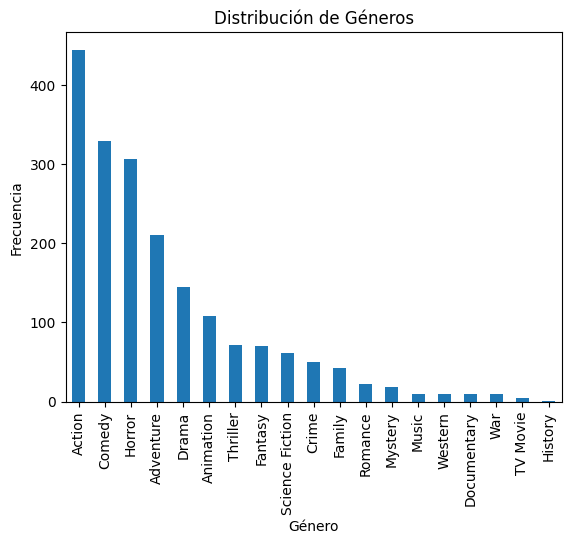

In [104]:
df_movies_modelo['genre'].value_counts().plot(kind='bar')
plt.title('Distribución de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

Histograma para saber el promedio de las calificaciones de las películas, las cuales se cencentran entre 5 y 8

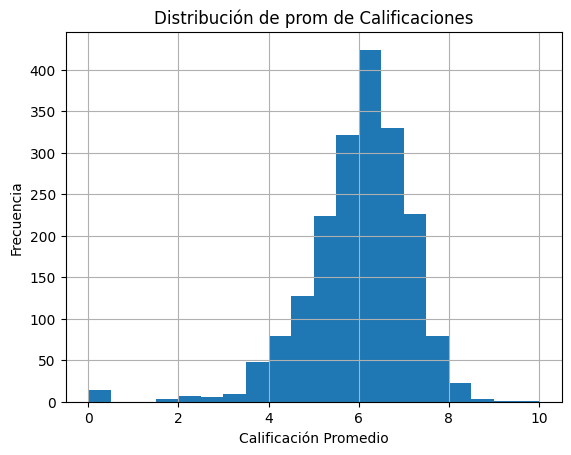

In [105]:
df_movies_modelo['vote_avg'].hist(bins=20)
plt.title('Distribución de prom de Calificaciones')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

ScatterPlot relacionando la fecha de lanzamiento de la película con las calificaciones promedio en esos años. Vemos que la cantidad de puntuaciones de películas se incrementó a partir de la década del '80, como así tb el rango de calificaciones

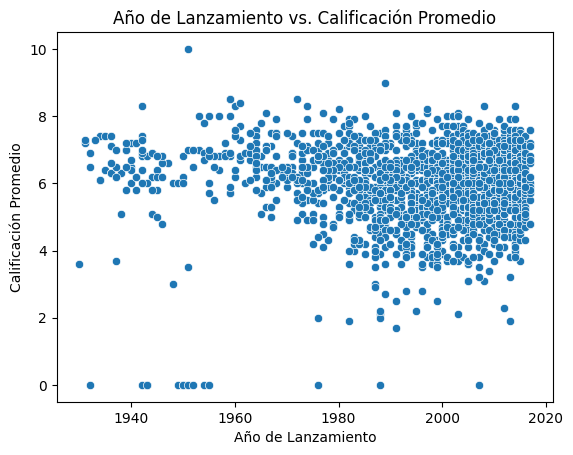

In [106]:
sns.scatterplot(x='release_year', y='vote_avg', data=df_movies_modelo)
plt.title('Año de Lanzamiento vs. Calificación Promedio')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio')
plt.show()

Nube de palabras con las mas comunes entre los títulos de las películas

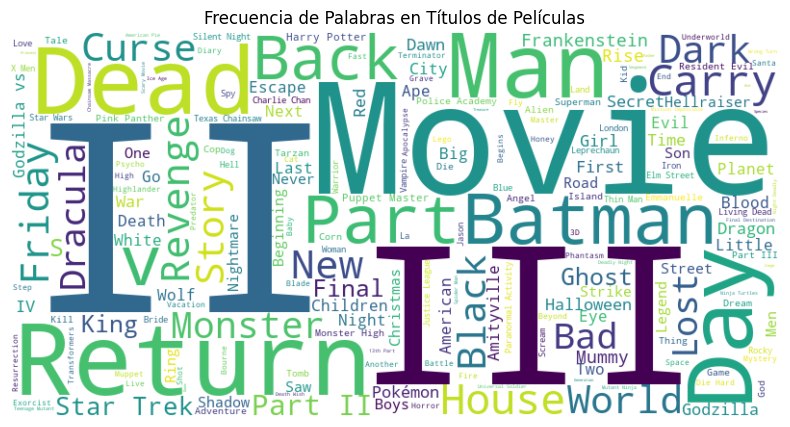

In [107]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_movies_modelo['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frecuencia de Palabras en Títulos de Películas')
plt.show()

Gráfico que muestra qué géneros recibieron mas cantidad de votos (calificaciones), lo cual demuestra que el género 'acción' es el más popular entre los usuarios que calificaron

In [108]:
# Se agrupa/fitra por género y se suman
votos_por_genero = df_movies_modelo.groupby('genre')['vote_count'].sum().reset_index()
votos_por_genero = votos_por_genero.sort_values(by='vote_count', ascending=False)
# Se ordenan los géneros ya agrupados según la cantidad de votos hayan tenido

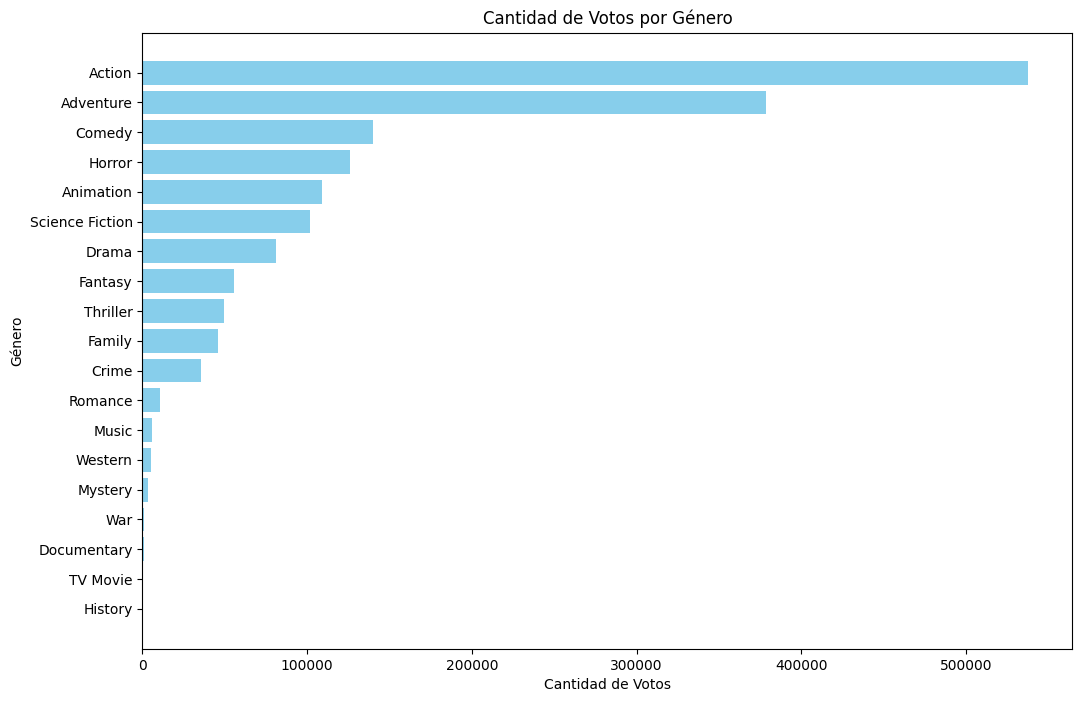

In [109]:
plt.figure(figsize=(12, 8))
plt.barh(votos_por_genero['genre'], votos_por_genero['vote_count'], color='skyblue')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Género')
plt.title('Cantidad de Votos por Género')
plt.gca().invert_yaxis()  # Invertir el eje y para que el género con más votos esté arriba
plt.show()

ScatterPlot que muestra la relación entre el género de las películas y sus calificaciones

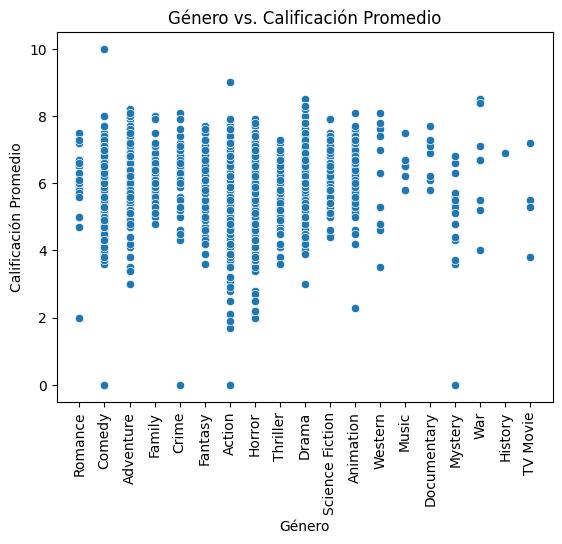

In [110]:
sns.scatterplot(x='genre', y='vote_avg', data=df_movies_modelo)
plt.title('Género vs. Calificación Promedio')
plt.xlabel('Género')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=90)
plt.show()

Similitud del Coseno

In [115]:
""" 
Se conviereten textos en una matriz numérica basandose en la importancia 
(según su frecuencia) de cada palabra.

Cada fila de la matriz que devuelve corresponde a un nombre de película, y 
cada columna a una palabra de ese nombre con el valor correspondiente a 
la importancia de la misma. --stop_words='english'

    """
    
vectorizacion = TfidfVectorizer()
matriz = vectorizacion.fit_transform(df_movies_modelo['title'])

In [112]:
# Se crea una matriz con las caracteristicas que considero son las necesarias para el modelo de recomendación
caracteristicas = np.column_stack([matriz.toarray(), df_movies_modelo['popularity'], df_movies_modelo['vote_count']])

In [113]:
df_movies_modelo = df_movies_modelo.reset_index(drop=True)

# Se realiza el cálculo de similitud del coseno
similitud_coseno = cosine_similarity(caracteristicas)

In [119]:
"""Esta función devuelve 5 peliculas recomendadas basada en la similitud del coseno
    
    - Si la pelicula ingresada no está en la base de datos, devuelve el correspondiente mensaje
    - Se busca en el df el indice de la pelicula ingresada.
    - Se crea una lista de tuplas. cada una de ella contiene el indice de una película y su puntaje 
    de similitud con respecto al título ingresado, y las ordena de forma descendente
    - Se va a iterar sobre cada una se esas tuplas en busca de los índices de laspelis
    mas similares (sin repetirlas) hasta llegar a 5.
    
    """
def recomendacion(titulo, similitud_coseno, df_movies_modelo, n_recomendaciones=5):
    if titulo not in df_movies_modelo['title'].values:
        return f"¡Lo siento! La película '{titulo}' no se encuentra, por favor intente con otro título."
    indice = df_movies_modelo[df_movies_modelo['title'] == titulo].index[0]

    similitudes = list(enumerate(similitud_coseno[indice]))
    similitudes = sorted(similitudes, key=lambda x: x[1], reverse=True)
    
    indices_similares = []
    titulos_recomendados = set()
    for i in similitudes:
        if i[0] != indice and df_movies_modelo['title'].iloc[i[0]] not in titulos_recomendados:
            indices_similares.append(i[0])
            titulos_recomendados.add(df_movies_modelo['title'].iloc[i[0]])
        if len(indices_similares) >= n_recomendaciones:
            break
    
    return df_movies_modelo['title'].iloc[indices_similares]

titulo_pelicula = 'Jurassic Park'
recomendaciones = recomendacion(titulo_pelicula, similitud_coseno, df_movies_modelo)
print(f"Películas recomendadas para '{titulo_pelicula}':")
print(recomendaciones)

Películas recomendadas para 'Jurassic Park':
1352                       The Hunger Games
1353                  The Dark Knight Rises
1066                           Transformers
1185    Transformers: Revenge of the Fallen
1317         Transformers: Dark of the Moon
Name: title, dtype: object
